## EDA on Data Entry CSV 
- the 'Data_Entry_2017.csv' is file containg Class labels and patient data for the entire dataset, I'll be exploring some population statistics with this file

- Later I will use the actual chest xray images to train a model and predict targets based on features in the images.

- Because of comorbidities, multiple findings in one image, maybe use multiclass multilabel approach, sigmoid fx for output (independent bernoulli distribution for each label|remember w/ softmax the probabilites of each label add up to 1) and binary cross entropy for loss fx

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('./data/Data_Entry_2017.csv')
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [80]:
data.shape

(112120, 12)

In [81]:
data['View Position'].value_counts()

PA    67310
AP    44810
Name: View Position, dtype: int64

In [82]:
data = data.iloc[:,0:6]

In [83]:
len(data['Finding Labels'].value_counts())

836

In [84]:
#lots of class labels, we know though that these are combinations of 15 labels(diseases) from Kaggle's data dictionary.
#lets put each label as its own column
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax',
                  'Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration',
                  'Fibrosis','Pneumonia', 'No Finding']
for pathology in pathology_list:
    data[pathology] = data['Finding Labels'].map(lambda x: 1 if pathology in x else 0)

In [85]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,...,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No Finding
0,00000001_000.png,Cardiomegaly,0,1,58,M,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,Hernia,0,3,81,F,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 21 columns):
Image Index           112120 non-null object
Finding Labels        112120 non-null object
Follow-up #           112120 non-null int64
Patient ID            112120 non-null int64
Patient Age           112120 non-null int64
Patient Gender        112120 non-null object
Cardiomegaly          112120 non-null int64
Emphysema             112120 non-null int64
Effusion              112120 non-null int64
Hernia                112120 non-null int64
Nodule                112120 non-null int64
Pneumothorax          112120 non-null int64
Atelectasis           112120 non-null int64
Pleural_Thickening    112120 non-null int64
Mass                  112120 non-null int64
Edema                 112120 non-null int64
Consolidation         112120 non-null int64
Infiltration          112120 non-null int64
Fibrosis              112120 non-null int64
Pneumonia             112120 non-null int64
No Fin

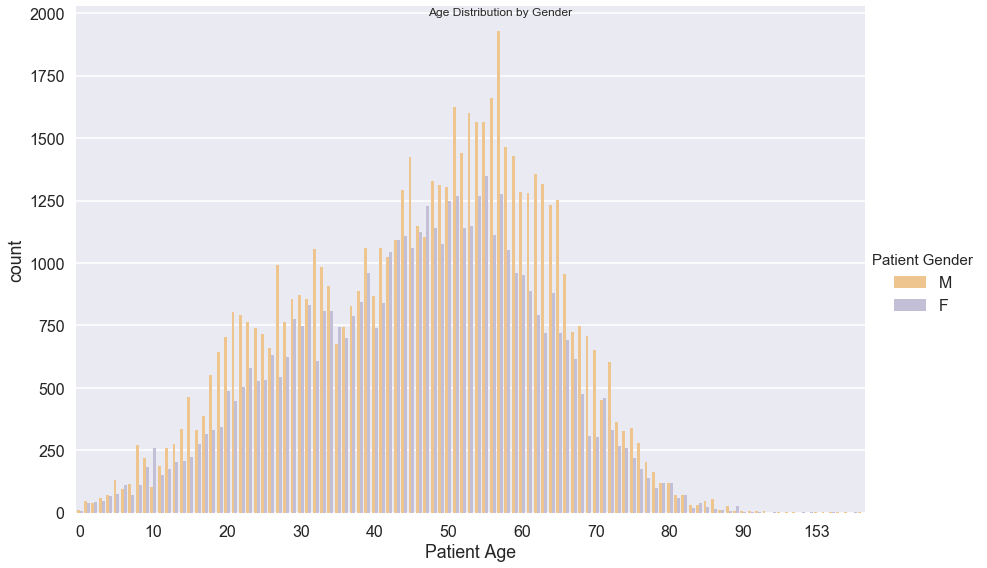

In [87]:
#learned this from https://www.kaggle.com/sbernadac/lung-deseases-data-analysis
g = sns.factorplot(x='Patient Age', hue = 'Patient Gender', kind = 'count', data=data,
                   size = 8,
                   aspect=1.5,
                   palette = 'PuOr')
g.set_xticklabels(np.arange(0,100))
g.set_xticklabels(step=10)
g.fig.suptitle('Age Distribution by Gender')


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 21 columns):
Image Index           112120 non-null object
Finding Labels        112120 non-null object
Follow-up #           112120 non-null int64
Patient ID            112120 non-null int64
Patient Age           112120 non-null int64
Patient Gender        112120 non-null object
Cardiomegaly          112120 non-null int64
Emphysema             112120 non-null int64
Effusion              112120 non-null int64
Hernia                112120 non-null int64
Nodule                112120 non-null int64
Pneumothorax          112120 non-null int64
Atelectasis           112120 non-null int64
Pleural_Thickening    112120 non-null int64
Mass                  112120 non-null int64
Edema                 112120 non-null int64
Consolidation         112120 non-null int64
Infiltration          112120 non-null int64
Fibrosis              112120 non-null int64
Pneumonia             112120 non-null int64
No Fin

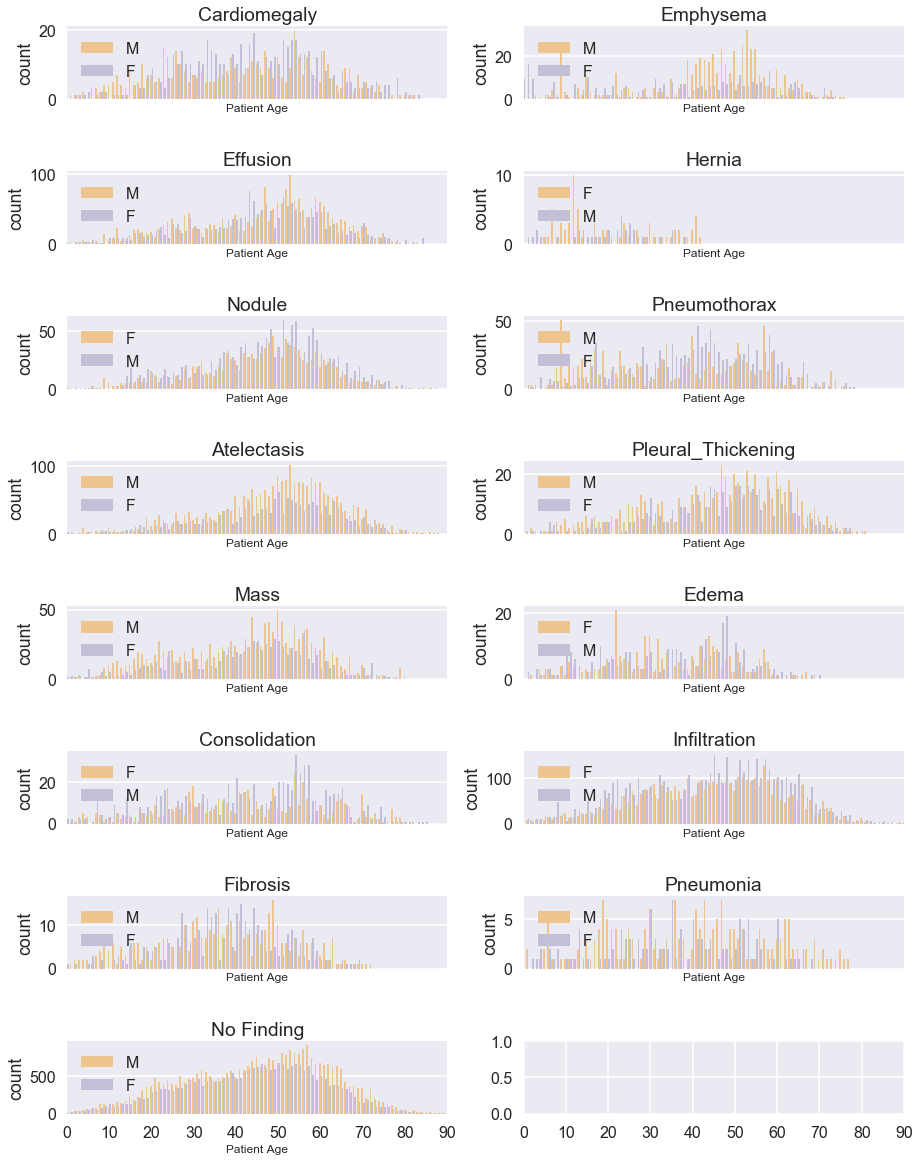

In [109]:
#learned this from https://www.kaggle.com/sbernadac/lung-deseases-data-analysis

fig, ax = plt.subplots(8,2, sharex=True, figsize=(15,20))
row = 0
col = 0
x=np.arange(0,100,10)
for pathology in pathology_list:
    g = sns.countplot('Patient Age', hue='Patient Gender',
                  data = data[data['Finding Labels']==pathology],
                  ax=ax[row][col],
                  palette ='PuOr') 
    g.legend(loc='upper left')
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    g.set_xlabel(xlabel = 'Patient Age', fontdict={'size': 12})
    
    ax[row, col].set_title(pathology)
    col = (col+1)%2
    if col==0:
        row=(row+1)%8
fig.subplots_adjust(hspace=1)
    

### Steps Remaing
* I will use a 5% sample of the image dataset
* I will probably have to resize/compress the images from 1024x1024 to something more manageable for my pc, maybe 128x128 or 256x256
* Feature 
* Figure out how to flatten the image into an array
* build NN topology in tensorFlow